# verbose
* model.fit과 predict 에서 사용하는 파라미터 

# Earlystopping
* 어느 정도 결과값이 나오게 되면 멈추게 하는 기능 
* model.fit에서 사용 

## 1. 데이터

In [1]:
import numpy as np

In [2]:
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
y_train = np.array([6,7,8])
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print("x_train.shape : ", x_train.shape) 
print("y_train.shape : ", y_train.shape) 

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)


## 2. 모델 구성

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [4]:
model = Sequential()
model.add(LSTM(7, input_shape = (5, 1), activation ='relu'))
model.add(Dense(4))
model.add(Dense(1))
model.save('savetest01.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7)                 252       
_________________________________________________________________
dense (Dense)                (None, 4)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련
* loss : 사용할 loss 함수 
* metrics : 사용할 측정 방식 
    - mes : mean squared error
    - accuracy : 정확도
    - mae : mean absolute error 
* verbose : 훈련하는 과정을 보일것이지 결정 
    - 0 : 보이지 않음
    - 1 : 과정을 보여줌 
    - 2 : 과정을 간단히 보여줌 

In [5]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

#### EarlyStopping 은 실무에서 많이 사용
* monitor는 loss 사용 
* patience=10 : 성능이 증가하지 않는 epoch이 10회이상 반복되면 중지 
* mode='min' : monitor의 loss 값이 min값, 즉 최솟값일 때 적용

In [7]:
early_stopping = EarlyStopping(monitor='loss', patience=10, mode='min')

In [8]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=1, verbose=2, callbacks=[early_stopping])

Train on 3 samples
Epoch 1/1000
3/3 - 1s - loss: 45.5272 - mse: 45.5272
Epoch 2/1000
3/3 - 0s - loss: 44.7379 - mse: 44.7379
Epoch 3/1000
3/3 - 0s - loss: 44.0425 - mse: 44.0425
Epoch 4/1000
3/3 - 0s - loss: 43.2158 - mse: 43.2159
Epoch 5/1000
3/3 - 0s - loss: 42.5150 - mse: 42.5150
Epoch 6/1000
3/3 - 0s - loss: 41.6118 - mse: 41.6118
Epoch 7/1000
3/3 - 0s - loss: 40.7821 - mse: 40.7821
Epoch 8/1000
3/3 - 0s - loss: 40.0344 - mse: 40.0344
Epoch 9/1000
3/3 - 0s - loss: 39.1035 - mse: 39.1035
Epoch 10/1000
3/3 - 0s - loss: 38.1820 - mse: 38.1820
Epoch 11/1000
3/3 - 0s - loss: 37.1578 - mse: 37.1578
Epoch 12/1000
3/3 - 0s - loss: 36.2414 - mse: 36.2414
Epoch 13/1000
3/3 - 0s - loss: 35.0693 - mse: 35.0693
Epoch 14/1000
3/3 - 0s - loss: 34.1100 - mse: 34.1100
Epoch 15/1000
3/3 - 0s - loss: 32.9530 - mse: 32.9530
Epoch 16/1000
3/3 - 0s - loss: 31.5896 - mse: 31.5896
Epoch 17/1000
3/3 - 0s - loss: 30.4769 - mse: 30.4769
Epoch 18/1000
3/3 - 0s - loss: 29.0209 - mse: 29.0209
Epoch 19/1000
3/3 

Epoch 157/1000
3/3 - 0s - loss: 0.1553 - mse: 0.1553
Epoch 158/1000
3/3 - 0s - loss: 0.1518 - mse: 0.1518
Epoch 159/1000
3/3 - 0s - loss: 0.1493 - mse: 0.1493
Epoch 160/1000
3/3 - 0s - loss: 0.1452 - mse: 0.1452
Epoch 161/1000
3/3 - 0s - loss: 0.1425 - mse: 0.1425
Epoch 162/1000
3/3 - 0s - loss: 0.1405 - mse: 0.1405
Epoch 163/1000
3/3 - 0s - loss: 0.1365 - mse: 0.1365
Epoch 164/1000
3/3 - 0s - loss: 0.1343 - mse: 0.1343
Epoch 165/1000
3/3 - 0s - loss: 0.1314 - mse: 0.1314
Epoch 166/1000
3/3 - 0s - loss: 0.1280 - mse: 0.1280
Epoch 167/1000
3/3 - 0s - loss: 0.1251 - mse: 0.1251
Epoch 168/1000
3/3 - 0s - loss: 0.1210 - mse: 0.1210
Epoch 169/1000
3/3 - 0s - loss: 0.1191 - mse: 0.1191
Epoch 170/1000
3/3 - 0s - loss: 0.1174 - mse: 0.1174
Epoch 171/1000
3/3 - 0s - loss: 0.1132 - mse: 0.1132
Epoch 172/1000
3/3 - 0s - loss: 0.1122 - mse: 0.1122
Epoch 173/1000
3/3 - 0s - loss: 0.1082 - mse: 0.1082
Epoch 174/1000
3/3 - 0s - loss: 0.1063 - mse: 0.1063
Epoch 175/1000
3/3 - 0s - loss: 0.1031 - mse: 

Epoch 312/1000
3/3 - 0s - loss: 0.0135 - mse: 0.0135
Epoch 313/1000
3/3 - 0s - loss: 0.0134 - mse: 0.0134
Epoch 314/1000
3/3 - 0s - loss: 0.0133 - mse: 0.0133
Epoch 315/1000
3/3 - 0s - loss: 0.0132 - mse: 0.0132
Epoch 316/1000
3/3 - 0s - loss: 0.0132 - mse: 0.0132
Epoch 317/1000
3/3 - 0s - loss: 0.0130 - mse: 0.0130
Epoch 318/1000
3/3 - 0s - loss: 0.0130 - mse: 0.0130
Epoch 319/1000
3/3 - 0s - loss: 0.0133 - mse: 0.0133
Epoch 320/1000
3/3 - 0s - loss: 0.0131 - mse: 0.0131
Epoch 321/1000
3/3 - 0s - loss: 0.0128 - mse: 0.0128
Epoch 322/1000
3/3 - 0s - loss: 0.0128 - mse: 0.0128
Epoch 323/1000
3/3 - 0s - loss: 0.0130 - mse: 0.0130
Epoch 324/1000
3/3 - 0s - loss: 0.0128 - mse: 0.0128
Epoch 325/1000
3/3 - 0s - loss: 0.0127 - mse: 0.0127
Epoch 326/1000
3/3 - 0s - loss: 0.0127 - mse: 0.0127
Epoch 327/1000
3/3 - 0s - loss: 0.0125 - mse: 0.0125
Epoch 328/1000
3/3 - 0s - loss: 0.0125 - mse: 0.0125
Epoch 329/1000
3/3 - 0s - loss: 0.0127 - mse: 0.0127
Epoch 330/1000
3/3 - 0s - loss: 0.0125 - mse: 

## 4. 학습과정확인

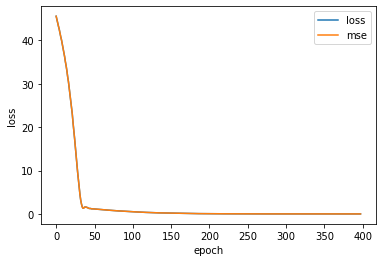

In [9]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 5. 평가 및 예측
* 예측값 데이터로 사용하기 위해 모양을 맞춰줘야 한다.

In [11]:
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print(x_predict.shape)

(1, 5)
(1, 5, 1)


In [12]:
y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

예측값 :  [[8.543009]]
